<a href="https://colab.research.google.com/github/suuizee/dap-2024/blob/main/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


1. Импортируйте модель данных "Ирисы Фишера".

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. Выполните нормализацию данных

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [ ]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 1.5, min_samples = 8).fit(iris_df_scaled)

df_1=iris_df_scaled['petal length (cm)']
df_2=iris_df_scaled['sepal width (cm)']
df_test_2=db_default.fit_predict(iris_df_scaled)
df_test_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

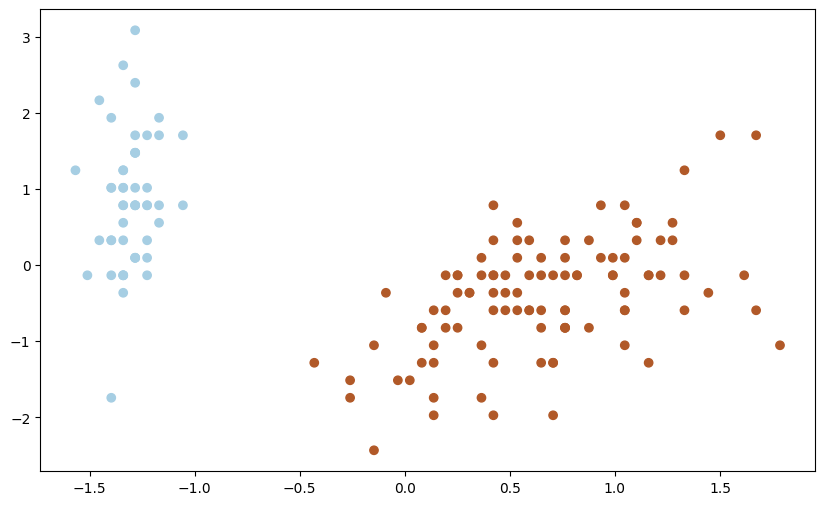

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(df_1, df_2, c = df_test_2, cmap = 'Paired')

## Вопросы

1. В чем состоит задача кластеризации?
2. Для каких целей используется кластеризацияия?
3. Алгоритм кластеризации Ллойда.
4. Как выбрать количество кластеров для алгоритма K-средних
5. Алгоритм DBSCAN